# Pandas Data Cleaning - Cumulative Lab

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Practice opening and inspecting the contents of CSVs using pandas dataframes
- Practice identifying and handling missing values
- Practice identifying and handling invalid values
- Practice cleaning text data by removing whitespace and fixing typos
- Practice joining multiple dataframes

## Your Task: Clean the Superheroes Dataset with Pandas

![LEGO superheroes](images/lego_superheroes.jpg)

Photo by <a href="https://unsplash.com/@yuliamatvienko?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Yulia Matvienko</a> on <a href="/s/photos/superhero?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Data Understanding
In this lab, we'll work with a version of the comprehensive Superheroes Dataset, which can be found on [Kaggle](https://www.kaggle.com/claudiodavi/superhero-set/data) and was originally scraped from [SuperHeroDb](https://www.superherodb.com/). We have modified the structure and contents of the dataset somewhat for the purposes of this lab.  Note that this data was collected in June 2017, so it may not reflect the most up-to-date superhero lore.

The data is contained in two separate CSV files:

1. `heroes_information.csv`: each record represents a superhero, with attributes of that superhero (e.g. eye color). Height is measured in centimeters, and weight is measured in pounds.
2. `super_hero_powers.csv`: each record represents a superpower, then has True/False values representing whether each superhero has that power

### Business Understanding

The business questions you have been provided are:

1. What is the distribution of superheroes by publisher?
2. What is the relationship between height and number of superpowers? And does this differ based on gender?
3. What are the 5 most common superpowers in Marvel Comics vs. DC Comics?

This lab also simulates something you are likely to encounter at some point or another in your career in data science: someone has given you access to a dataset, as well as a few questions, and has told you to "find something interesting".

So, in addition to completing the basic data cleaning tasks and the aggregation and reshaping tasks needed to answer the provided questions, you will also need to formulate a question of your own and perform any additional cleaning/aggregation/reshaping that is needed to answer it.

### Requirements

#### 1. Load the Data with Pandas

Create a dataframes `heroes_df` and `powers_df` that represent the two CSV files. Use pandas methods to inspect the shape and other attributes of these dataframes.

#### 2. Perform Data Cleaning Required to Answer First Question

The first question is: *What is the distribution of superheroes by publisher?*

In order to answer this question, you will need to:

* Identify and handle missing values
* Identify and handle text data requiring cleaning

#### 3. Perform Data Aggregation and Cleaning Required to Answer Second Question

The second question is: *What is the relationship between height and number of superpowers? And does this differ based on gender?*

In order to answer this question, you will need to:

* Join the dataframes together
* Identify and handle invalid values

#### 4. Perform Data Aggregation Required to Answer Third Question

The third question is: *What are the 5 most common superpowers in Marvel Comics vs. DC Comics?*

This should not require any additional data cleaning or joining of tables, but it will require some additional aggregation.

#### 5. Formulate and Answer Your Own Question

This part is fairly open-ended. Think of a question that can be answered with the available data, and perform any cleaning or aggregation required to answer that question.

## 1. Load the Data with Pandas

In the cell below, we:

* Import and alias `pandas` as `pd`
* Import and alias `numpy` as `np`
* Import and alias `seaborn` as `sns`
* Import and alias `matplotlib.pyplot` as `plt`
* Set Matplotlib visualizations to display inline in the notebook

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Superheroes

In the cell below, load `heroes_information.csv` as `heroes_df`:

In [9]:
heroes_df = pd.read_csv('Enter your path to the csv file')
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks like that CSV came with an index column, resulting in an extra column called `Unnamed: 0`. We don't need that column, so write code to get rid of it below.

There are two ways to do this:

1. Re-load with `read_csv`, and specify the parameter `index_col=0`
2. Drop the column `Unnamed: 0` with `axis=1`

In [10]:
heroes_df = pd.read_csv('Enter your path to the csv file', index_col=0)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


The following code checks that the dataframe was loaded correctly.

In [11]:

# There should be 734 rows
assert heroes_df.shape[0] == 734

# There should be 10 columns. If this fails, make sure you got rid of
# the extra index column
assert heroes_df.shape[1] == 10

# These should be the columns
assert list(heroes_df.columns) == ['name', 'Gender', 'Eye color', 'Race',
 'Hair color', 'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight']

Now you want to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, inspect the overall shape of the dataframe:

In [12]:
heroes_df.shape

(734, 10)

Now let's look at the info printout:

In [13]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


In the cell below, interpret that information. Do the data types line up with what we expect? Are there any missing values?

In [14]:
"""
The data types seem to line up with what we expect. The columns
containing strings are type object, whereas the columns containing
decimal numbers (height and weight) are type float64.

We can see that there are missing/NaN values in the Publisher and
Weight columns, since there are 734 total rows and each of those
columns contains fewer than 734 non-null values

We also see that this data source contains some placeholders for
missing values, rather than being NaN. Specifically in the Skin Color
column there are "-" characters filled in in some places. If we want
to use that information, we'll need to make a decision about what to
do with those "-" values.
"""

'\nThe data types seem to line up with what we expect. The columns\ncontaining strings are type object, whereas the columns containing\ndecimal numbers (height and weight) are type float64.\n\nWe can see that there are missing/NaN values in the Publisher and\nWeight columns, since there are 734 total rows and each of those\ncolumns contains fewer than 734 non-null values\n\nWe also see that this data source contains some placeholders for\nmissing values, rather than being NaN. Specifically in the Skin Color\ncolumn there are "-" characters filled in in some places. If we want\nto use that information, we\'ll need to make a decision about what to\ndo with those "-" values.\n'

### Superpowers

Now, repeat the same process with `super_hero_powers.csv`. Name the dataframe `powers_df`. This time, make sure you use `index_col=0` when opening the CSV because the index contains important information.

In [15]:
powers_df = pd.read_csv('Enter your path the csv file', index_col=0)
powers_df.head()

,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent Bob,...,Wonder Man,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom
Agility,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Accelerated Healing,False,True,True,False,True,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
Lantern Power Ring,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Dimensional Awareness,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cold Resistance,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [16]:
powers_df.shape

(167, 667)

In [17]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Agility to Omniscient
Columns: 667 entries, 3-D Man to Zoom
dtypes: bool(667)
memory usage: 110.1+ KB


In [18]:
powers_df.isna().sum().sum()

0

In [19]:
"""
This dataframe has more rows than columns. Every single value
in it is a bool, and there are no missing values.
"""

'\nThis dataframe has more rows than columns. Every single value\nin it is a bool, and there are no missing values.\n'

The following code will check if it was loaded correctly:

In [20]:

# There should be 167 rows, 667 columns
assert powers_df.shape == (167, 667)

# The first column should be '3-D Man'
assert powers_df.columns[0] == '3-D Man'

# The last column should be 'Zoom'
assert powers_df.columns[-1] == 'Zoom'

# The first index should be 'Agility'
assert powers_df.index[0] == 'Agility'

# The last index should be 'Omniscient'
assert powers_df.index[-1] == 'Omniscient'

<AxesSubplot:>

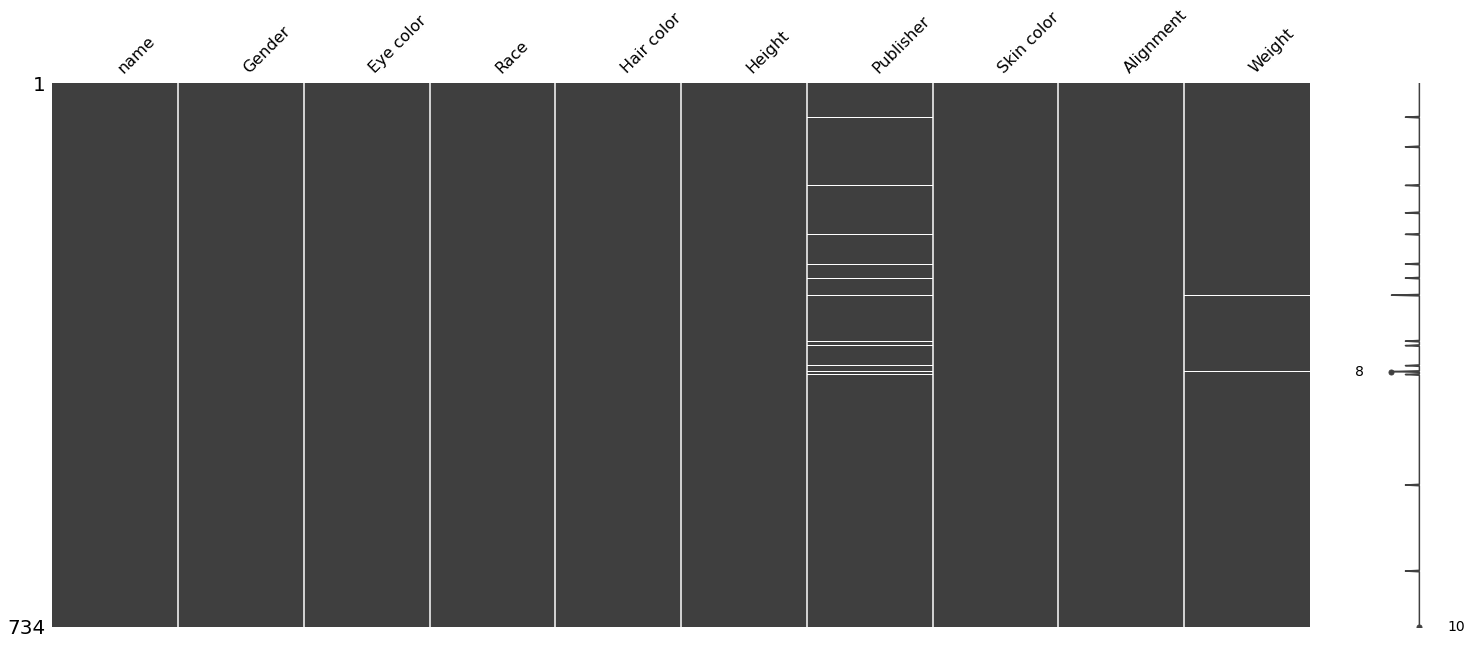

In [21]:
# Some extra packages to know -- check the NA values; 
import missingno as msno
# Gives positional information of the missing values
msno.matrix(heroes_df)

In [22]:
heroes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,734.0,102.254087,139.624543,-99.0,-99.0,175.0,185.0,975.0
Weight,732.0,43.855191,130.823733,-99.0,-99.0,62.0,90.0,900.0


## 2. Perform Data Cleaning Required to Answer First Question

Recall that the first question is: *What is the distribution of superheroes by publisher?*

To answer this question, we will only need to use `heroes_df`, which contains the `Publisher` column.

### Identifying and Handling Missing Values

As you likely noted above, the `Publisher` column is missing some values. Let's take a look at some samples with and without missing publisher values:

In [23]:
has_publisher_sample = heroes_df[heroes_df["Publisher"].notna()].sample(5, random_state=1)
has_publisher_sample

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
60,Banshee,Male,green,Human,Strawberry Blond,183.0,Marvel Comics,-,good,77.0
61,Bantam,Male,brown,-,Black,165.0,Marvel Comics,-,good,54.0
219,DL Hawkins,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
650,Synch,Male,brown,-,Black,180.0,Marvel Comics,-,good,74.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0


In [24]:
missing_publisher_sample = heroes_df[heroes_df["Publisher"].isna()].sample(5, random_state=1)
missing_publisher_sample

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
381,Katniss Everdeen,Female,-,Human,-,-99.0,NaN,-,good,-99.0


What do we want to do about these missing values?

Recall that there are two general strategies for dealing with missing values:

1. Fill in missing values (either using another value from the column, e.g. the mean or mode, or using some other value like "Unknown")
2. Drop rows with missing values

Write your answer below, and explain how it relates to the information we have:

In [25]:
"""
Let's take a look at those examples. We have Chuck Norris (an actual
person), Katniss Everdeen (a character from The Hunger Games books and
movies), and Flash Gordon (a character from comics published by King
Features Syndicate). It doesn't seem very sensible to fill in the
most common publisher (to say that these are all Marvel Comics), or
to put them all in the same "other" bucket.

Also since the publisher is the only relevant variable for this
question, we want to be more careful that the information encoded there
is meaningful and useful. We don't want to just haphazardly fill it in
in order to be able to run a statistical test or model.

Therefore let's go with option 2, and drop all of the rows where
the publisher is missing.
"""

'\nLet\'s take a look at those examples. We have Chuck Norris (an actual\nperson), Katniss Everdeen (a character from The Hunger Games books and\nmovies), and Flash Gordon (a character from comics published by King\nFeatures Syndicate). It doesn\'t seem very sensible to fill in the\nmost common publisher (to say that these are all Marvel Comics), or\nto put them all in the same "other" bucket.\n\nAlso since the publisher is the only relevant variable for this\nquestion, we want to be more careful that the information encoded there\nis meaningful and useful. We don\'t want to just haphazardly fill it in\nin order to be able to run a statistical test or model.\n\nTherefore let\'s go with option 2, and drop all of the rows where\nthe publisher is missing.\n'

Now, implement your chosen strategy using code. (You can also check the solution branch for the answer to the question above if you're really not sure.)

In [26]:
heroes_df.dropna(subset=["Publisher"], inplace=True)

Now there should be no missing values in the publisher column:

In [27]:
assert heroes_df["Publisher"].isna().sum() == 0

### Identifying and Handling Text Data Requiring Cleaning

The overall field of natural language processing (NLP) is quite broad, and we're not going to get into any advanced text processing, but it's useful to be able to clean up minor issues in text data.

Let's take a look at the counts of heroes grouped by publisher:

In [28]:
heroes_df["Publisher"].value_counts()

Marvel Comics        379
DC Comics            212
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Marvel                 9
Star Trek              6
HarperCollins          6
Team Epic TV           5
SyFy                   5
IDW Publishing         4
Icon Comics            4
ABC Studios            4
Shueisha               4
Wildstorm              3
 DC Comics             3
Sony Pictures          2
Titan Books            1
Microsoft              1
Rebellion              1
Hanna-Barbera          1
J. K. Rowling          1
Universal Studios      1
South Park             1
J. R. R. Tolkien       1
Name: Publisher, dtype: int64

There are two cases where we appear to have data entry issues, and publishers that should be encoded the same have not been. In other words, there are four categories present that really should be counted as two categories (and you do not need specific comic book knowledge to be able to identify them).

Identify those two cases below:

In [29]:
"""
(1) We have both "Marvel Comics" and "Marvel" (missing the word "Comics")
(2) We have both "DC Comics" and " DC Comics" (with an extra space at the beginning)
"""

'\n(1) We have both "Marvel Comics" and "Marvel" (missing the word "Comics")\n(2) We have both "DC Comics" and " DC Comics" (with an extra space at the beginning)\n'

Now, write some code to handle these cases. If you're not sure where to start, look at the pandas documentation for [replacing values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html) and [stripping off whitespace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html).

In [30]:

heroes_df["Publisher"] = heroes_df["Publisher"].replace("Marvel", "Marvel Comics")
heroes_df["Publisher"] = heroes_df["Publisher"].str.strip()

Check your work below:

In [31]:
heroes_df["Publisher"].value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Star Trek              6
HarperCollins          6
SyFy                   5
Team Epic TV           5
Icon Comics            4
ABC Studios            4
IDW Publishing         4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
South Park             1
Universal Studios      1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: Publisher, dtype: int64

### Answering the Question

Now we should be able to answer *What is the distribution of superheroes by publisher?*

If your data cleaning was done correctly, this code should work without any further changes:

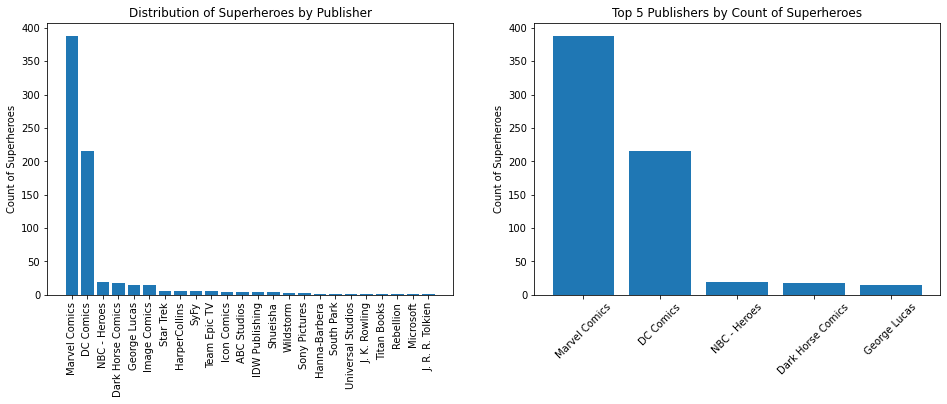

In [32]:

# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = heroes_df["Publisher"].value_counts()
top_5_counts = value_counts.iloc[:5]

# Plot data
ax1.bar(value_counts.index, value_counts.values)
ax2.bar(top_5_counts.index, top_5_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Distribution of Superheroes by Publisher")
ax2.set_title("Top 5 Publishers by Count of Superheroes");

## 3. Perform Data Aggregation and Cleaning Required to Answer Second Question

Recall that the second question is: *What is the relationship between height and number of superpowers? And does this differ based on gender?*

Unlike the previous question, we won't be able to answer this with just `heroes_df`, since information about height is contained in `heroes_df`, while information about superpowers is contained in `powers_df`.

### Joining the Dataframes Together

First, identify the shared key between `heroes_df` and `powers_df`. (Shared key meaning, the values you want to join on.) Let's look at them again:

In [33]:
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [34]:
powers_df

,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent Bob,...,Wonder Man,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom
Agility,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Accelerated Healing,False,True,True,False,True,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
Lantern Power Ring,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Dimensional Awareness,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cold Resistance,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Phoenix Force,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Molecular Dissipation,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Vision - Cryo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Omnipresent,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, identify the shared key, and your strategy for joining the data (e.g. what will one record represent after you join, will you do a left/right/inner/outer join):

In [35]:
"""
The shared key between these datasets is the name of the superhero. In heroes_df,
this is represented by the name column. In powers_df, this is represented by the
column names themselves.

The fact that one of them is the values of a column and the other is the column
names means that we will need to transpose one of them first. It makes the most
sense to transpose powers_df since that will result in records still representing
a hero, rather than a power. This will work with the question at hand, which asks
about heights, which are attributes of superheroes, not attributers of superpowers.

powers_df has fewer columns than heroes_df has rows, but we can also see that
powers_df contains names that are not present in heroes_df (namely '3-D Man'). So,
it seems like an inner joing is the right approach, so that we only keep records
that are present in both datasets.
"""

"\nThe shared key between these datasets is the name of the superhero. In heroes_df,\nthis is represented by the name column. In powers_df, this is represented by the\ncolumn names themselves.\n\nThe fact that one of them is the values of a column and the other is the column\nnames means that we will need to transpose one of them first. It makes the most\nsense to transpose powers_df since that will result in records still representing\na hero, rather than a power. This will work with the question at hand, which asks\nabout heights, which are attributes of superheroes, not attributers of superpowers.\n\npowers_df has fewer columns than heroes_df has rows, but we can also see that\npowers_df contains names that are not present in heroes_df (namely '3-D Man'). So,\nit seems like an inner joing is the right approach, so that we only keep records\nthat are present in both datasets.\n"

In the cell below, create a new dataframe called `heroes_and_powers_df` that contains the joined data. You can look at the above answer in the solution branch if you're not sure where to start.

***Hint:*** Note that the `.join` method requires that the two dataframes share an index ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)) whereas the `.merge` method can join using any columns ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)). It is up to you which one you want to use.

In [36]:

# First, get a transposed version of the powers dataframe. This means
# that what used to be the row index is now the column name, and vice
# versa
powers_df_transposed = powers_df.T
powers_df_transposed

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Ymir,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Yoda,True,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Zatanna,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:

# Now we can reset the index so that the first column is called "name"
powers_df_transposed.index.name = "name"
powers_df_transposed.reset_index(inplace=True)
powers_df_transposed

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:

# Then actually merge the dataframes together, using "name" as the shared key
# and "inner" so we don't keep anything with a NaN on either side

# If we had named the columns differently in the two dataframes, there is also
# an option to specify `left_on` and `right_on` instead of just `on`. Just `on`
# is like USING in a SQL join; it looks for the same column in both dataframes
heroes_and_powers_df = heroes_df.merge(powers_df_transposed, on="name", how="inner")

# Alternatively, you could set the index of both to be "name", then use .join
# heroes_and_powers_df = heroes_df.set_index("name").join(powers_df_transposed.set_index("name"), how="inner")

heroes_and_powers_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,...,False,False,False,False,False,False,False,False,False,False
643,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,...,False,False,False,False,False,False,False,False,False,False
644,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,...,False,False,False,False,False,False,False,False,False,False
645,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0,...,False,False,False,False,False,False,False,False,False,False


Run the code below to check your work:

In [39]:

# Confirms you have created a dataframe with the specified name
assert type(heroes_and_powers_df) == pd.DataFrame

# Confirms you have the right number of rows
assert heroes_and_powers_df.shape[0] == 647

# Confirms you have the necessary columns
# (If you modified the value of powers_df along the way, you might need to
# modify this test. We are checking that all of the powers are present as
# columns.)
assert [power in heroes_and_powers_df.columns for power in powers_df.index]
# (If you modified the value of heroes_df along the way, you mgith need to 
# modify this as well. We are checking that all of the attribute columns from
# heroes_df are present as columns in the joined df)
assert [attribute in heroes_and_powers_df.columns for attribute in heroes_df.columns]

Now that we have created a joined dataframe, we can aggregate the number of superpowers by superhero. This code is written for you:

In [40]:

# Note: we can use sum() with True and False values and they will
# automatically be cast to 1s and 0s
heroes_and_powers_df["Power Count"] = sum([heroes_and_powers_df[power_name] for power_name in powers_df.index])
heroes_and_powers_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,7
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,16
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,1
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,8
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,...,False,False,False,False,False,False,False,False,False,3
643,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,...,False,False,False,False,False,False,False,False,False,6
644,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,...,False,False,False,False,False,False,False,False,False,19
645,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0,...,False,False,False,False,False,False,False,False,False,8


### Answering the Question

Now we can plot the height vs. the count of powers:

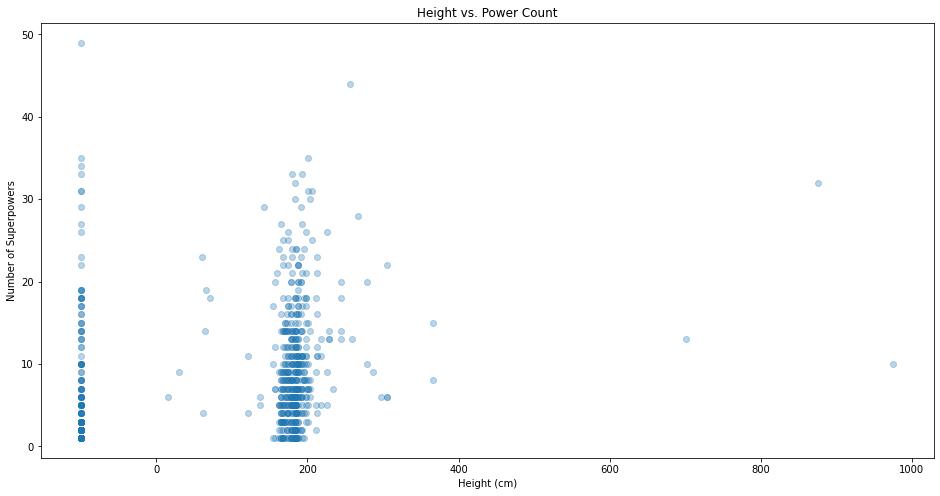

In [41]:

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=heroes_and_powers_df["Height"],
    y=heroes_and_powers_df["Power Count"],
    alpha=0.3
)

ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count");

Hmm...what is that stack of values off below zero? What is a "negative" height?

### Identifying and Handling Invalid values

One of the trickier tasks in data cleaning is identifying invalid or impossible values. In these cases, you have to apply your domain knowledge rather than any particular computational technique. For example, if you were looking at data containing dates of past home sales, and one of those dates was 100 years in the future, pandas wouldn't flag that as an issue, but you as a data scientist should be able to identify it.

In this case, we are looking at heights, which are 1-dimensional, positive numbers. In theory we could have a very tiny height close to 0 cm because the hero is microscopic, but it does not make sense that we would have a height below zero.

Let's take a look at a sample of those negative heights:

In [42]:
heroes_and_powers_df[heroes_and_powers_df["Height"] < 0].sample(5, random_state=1)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
150,Chameleon,Male,-,-,-,-99.0,DC Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,1
163,Crimson Crusader,Male,blue,-,Strawberry Blond,-99.0,Marvel Comics,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,4
364,Luna,Female,-,Human,-,-99.0,Marvel Comics,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,1
315,JJ Powell,Male,-,-,-,-99.0,ABC Studios,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,1
630,Weapon XI,Male,-,-,-,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,7


It looks like not only are those heights negative, those weights are negative also, and all of them are set to exactly -99.0.

It seems like this data source probably filled in -99.0 as the height or weight whenever it was unknown, instead of just leaving it as NaN.

Depending on the purpose of the analysis, maybe this would be a useful piece of information, but for our current question, let's go ahead and drop the records where the height is -99.0. We'll make a new temporary dataframe to make sure we don't accidentally delete anything that will be needed in a future question.

In [43]:
question_2_df = heroes_and_powers_df[heroes_and_powers_df["Height"] != -99.0].copy()
question_2_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,7
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,16
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,1
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,8
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,...,False,False,False,False,False,False,False,False,False,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,...,False,False,False,False,False,False,False,False,False,3
643,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,...,False,False,False,False,False,False,False,False,False,6
644,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,...,False,False,False,False,False,False,False,False,False,19
645,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0,...,False,False,False,False,False,False,False,False,False,8


### Answering the Question, Again

Now we can redo that plot without those negative heights:

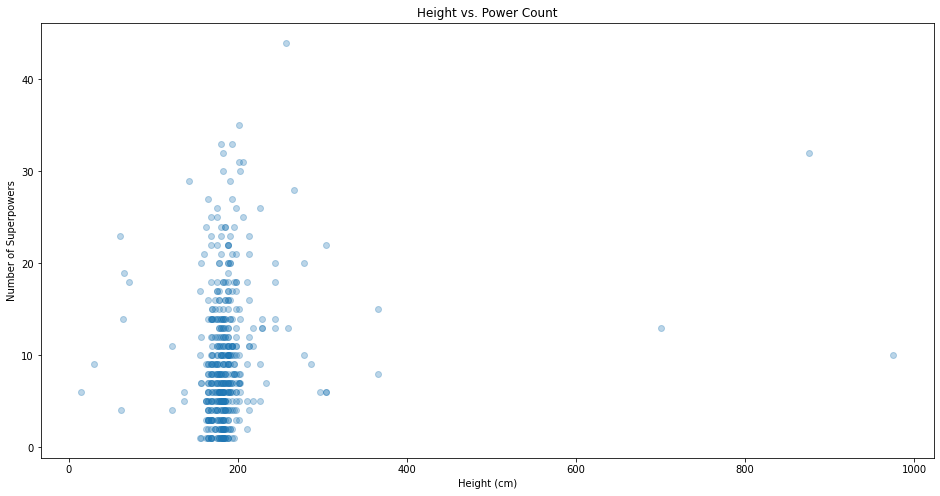

In [44]:

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=question_2_df["Height"],
    y=question_2_df["Power Count"],
    alpha=0.3
)

ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count");

Ok, that makes more sense. It looks like there is not much of a relationship between height and number of superpowers.

Now we can go on to answering the second half of question 2: *And does this differ based on gender?*

To indicate multiple categories within a scatter plot, we can use color to add a third dimension:

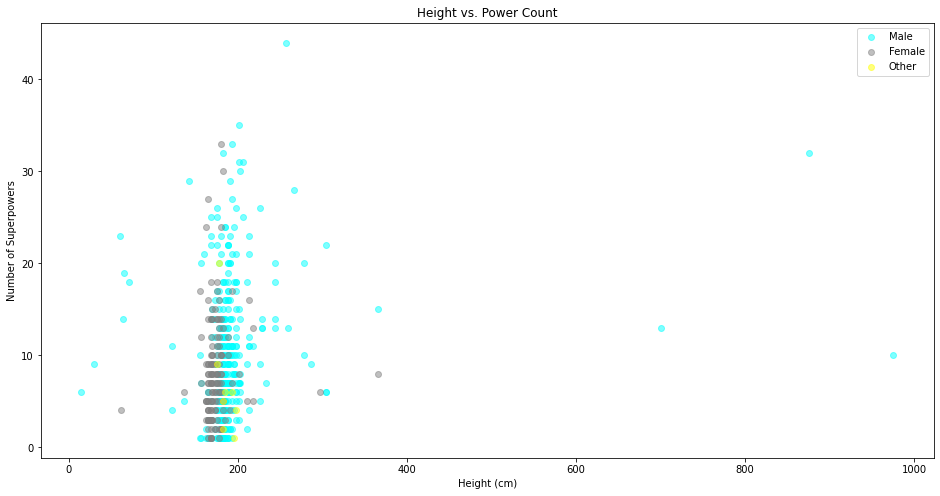

In [45]:

fig, ax = plt.subplots(figsize=(16, 8))

# Select subsets
question_2_male = question_2_df[question_2_df["Gender"] == "Male"]
question_2_female = question_2_df[question_2_df["Gender"] == "Female"]
question_2_other = question_2_df[(question_2_df["Gender"] != "Male") & (question_2_df["Gender"] != "Female")]

# Plot data with different colors
ax.scatter(
    x=question_2_male["Height"],
    y=question_2_male["Power Count"],
    alpha=0.5,
    color="cyan",
    label="Male"
)
ax.scatter(
    x=question_2_female["Height"],
    y=question_2_female["Power Count"],
    alpha=0.5,
    color="gray",
    label="Female"
)
ax.scatter(
    x=question_2_other["Height"],
    y=question_2_other["Power Count"],
    alpha=0.5,
    color="yellow",
    label="Other"
)

# Customize appearance
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count")
ax.legend();

It appears that there is still no clear relationship between count of powers and height, regardless of gender. We do however note that "Male" is the most common gender, and that male superheroes tend to be taller, on average.

## 4. Perform Data Aggregation Required to Answer Third Question

Recall that the third question is: *What are the 5 most common superpowers in Marvel Comics vs. DC Comics?*

We'll need to keep using `heroes_and_powers_df` since we require information from both `heroes_df` and `powers_df`.

Your resulting `question_3_df` should contain aggregated data, with columns `Superpower Name`, `Marvel Comics` (containing the count of occurrences in Marvel Comics), and `DC Comics` (containing the count of occurrences in DC Comics). Each row should represent a superpower.

In other words, `question_3_df` should look like this:

![question 3 df](images/question_3.png)

Don't worry if the rows or columns are in a different order, all that matters is that you have the right rows and columns with all the data.

***Hint:*** refer to the [documentation for `.groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and treat each publisher as a group.

In [46]:

# Start by dropping rows and columns that we know are irrelevant

question_3_df = heroes_and_powers_df.copy()

# Only rows with a relevant publisher
question_3_df = question_3_df[
    (question_3_df["Publisher"] == "Marvel Comics") | \
    (question_3_df["Publisher"] == "DC Comics")
]

# Only columns needed are Publisher and powers
relevant_cols = list(powers_df.index)
relevant_cols.append("Publisher")
question_3_df = question_3_df[relevant_cols]

question_3_df

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Publisher
0,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,DC Comics
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics
4,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics
5,False,False,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics
642,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics
643,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Marvel Comics
645,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,DC Comics


In [47]:

# Now group by Publisher

# Note that grouping requires an associated aggregation,
# similar to COUNT or SUM after GROUP BY in SQL

# Here the relevant aggregation is a sum, since it will
# treat all True values as 1 and False values as 0, then
# add them all together
question_3_df = question_3_df.groupby("Publisher").sum()
question_3_df

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Publisher,,,,,,,,,,,,,,,,,,,,,
DC Comics,71,51,11,7,15,71,48,30,86,3,...,0,3,0,1,1,0,1,1,0,0
Marvel Comics,126,100,0,16,25,154,47,43,111,20,...,16,8,2,8,0,1,0,0,1,1


In [48]:

# Now transpose so that each record represents a superpower
question_3_df = question_3_df.T
question_3_df

Publisher,DC Comics,Marvel Comics
Agility,71,126
Accelerated Healing,51,100
Lantern Power Ring,11,0
Dimensional Awareness,7,16
Cold Resistance,15,25
...,...,...
Phoenix Force,0,1
Molecular Dissipation,1,0
Vision - Cryo,1,0
Omnipresent,0,1


In [49]:

# Reset the index so that there is a column "Superpower Name"
question_3_df.index.name = "Superpower Name"
question_3_df.reset_index(inplace=True)

# Also, the columns don't need a name any more (they
# automatically got the name "Publisher" from groupby).
# This is a cosmetic change.
question_3_df.columns.name = None

question_3_df

,Superpower Name,DC Comics,Marvel Comics
0,Agility,71,126
1,Accelerated Healing,51,100
2,Lantern Power Ring,11,0
3,Dimensional Awareness,7,16
4,Cold Resistance,15,25
...,...,...,...
162,Phoenix Force,0,1
163,Molecular Dissipation,1,0
164,Vision - Cryo,1,0
165,Omnipresent,0,1


The code below checks that you have the correct dataframe structure:

In [50]:

# Checking that you made a dataframe called question_3_df
assert type(question_3_df) == pd.DataFrame

# Checking the shape
assert question_3_df.shape == (167, 3)

# Checking the column names
assert sorted(list(question_3_df.columns)) == ['DC Comics', 'Marvel Comics', 'Superpower Name']

### Answering the Question

The code below uses the dataframe you created to find and plot the most common superpowers in Marvel Comics and DC Comics.

In [51]:

marvel_most_common = question_3_df.drop("DC Comics", axis=1)
marvel_most_common = marvel_most_common.sort_values(by="Marvel Comics", ascending=False)[:5]
marvel_most_common

,Superpower Name,Marvel Comics
17,Super Strength,204
5,Durability,154
25,Stamina,150
30,Super Speed,137
0,Agility,126


In [52]:

dc_most_common = question_3_df.drop("Marvel Comics", axis=1)
dc_most_common = dc_most_common.sort_values(by="DC Comics", ascending=False)[:5]
dc_most_common

,Superpower Name,DC Comics
17,Super Strength,109
25,Stamina,90
8,Flight,86
30,Super Speed,79
5,Durability,71


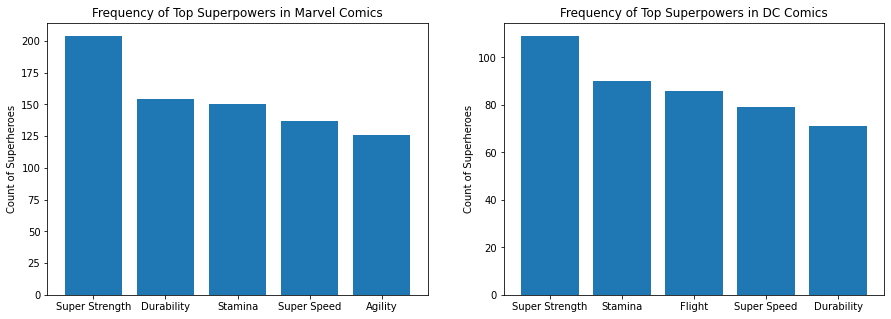

In [53]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

ax1.bar(
    x=marvel_most_common["Superpower Name"],
    height=marvel_most_common["Marvel Comics"]
)
ax2.bar(
    x=dc_most_common["Superpower Name"],
    height=dc_most_common["DC Comics"]
)

ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Frequency of Top Superpowers in Marvel Comics")
ax2.set_title("Frequency of Top Superpowers in DC Comics");

It looks like super strength is the most popular power in both Marvel Comics and DC Comics. Overall, the top 5 powers are fairly similar — 4 out of 5 overlap, although Marvel contains agility whereas DC contains flight.

## 5. Formulate and Answer Your Own Question

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight)?
* What is the distribution of skin colors amongst alien heroes?
* How are eye color and hair color related in this dataset?

Explain your question below:

Some sample cells have been provided to give you room to work. Feel free to create more cells as needed.

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

(There is no solution branch for this part, and feel free to move on to the next lesson if you have already spent more than 90 minutes.)

## Summary

In this lab, you demonstrated your mastery of using pandas to clean and aggregate data in order to answer several business questions. This included identifying and handling missing values, text requiring preprocessing, and invalid values. You also performed aggregation and reshaping tasks such as transposing, joining, and grouping data. Great job, there was a lot here!